In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_housing = pd.read_csv(r"C:\Users\hp\Downloads\HousingData.csv")

In [3]:
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.069959,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250233,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### the std of 'CRIM','ZN','INDUS','AGE','LSTAT' is greater than 3 which means there are outliers so, we use Median to fill na values
#### while the std of CHAS is not affected by outliers so we use mean 

In [7]:
iqrc = ['CRIM','ZN','INDUS','AGE','LSTAT']
for col in iqrc:
    if col in boston_housing.columns:
        Q1 = boston_housing[col].quantile(0.25)
        Q3 = boston_housing[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_val = boston_housing[col].median()
        boston_housing[col] = boston_housing[col].fillna(median_val)

        # Optional: cap extreme outliers
        # boston_housing[col] = np.where(boston_housing[col] < lower_bound, lower_bound,
                               # np.where(boston_housing[col] > upper_bound, upper_bound, boston_housing[col]))

# Column to impute using mean (CHAS)
if 'CHAS' in boston_housing.columns:
    chas_mean = boston_housing['CHAS'].mean()
    boston_housing['CHAS'] = boston_housing['CHAS'].fillna(chas_mean)

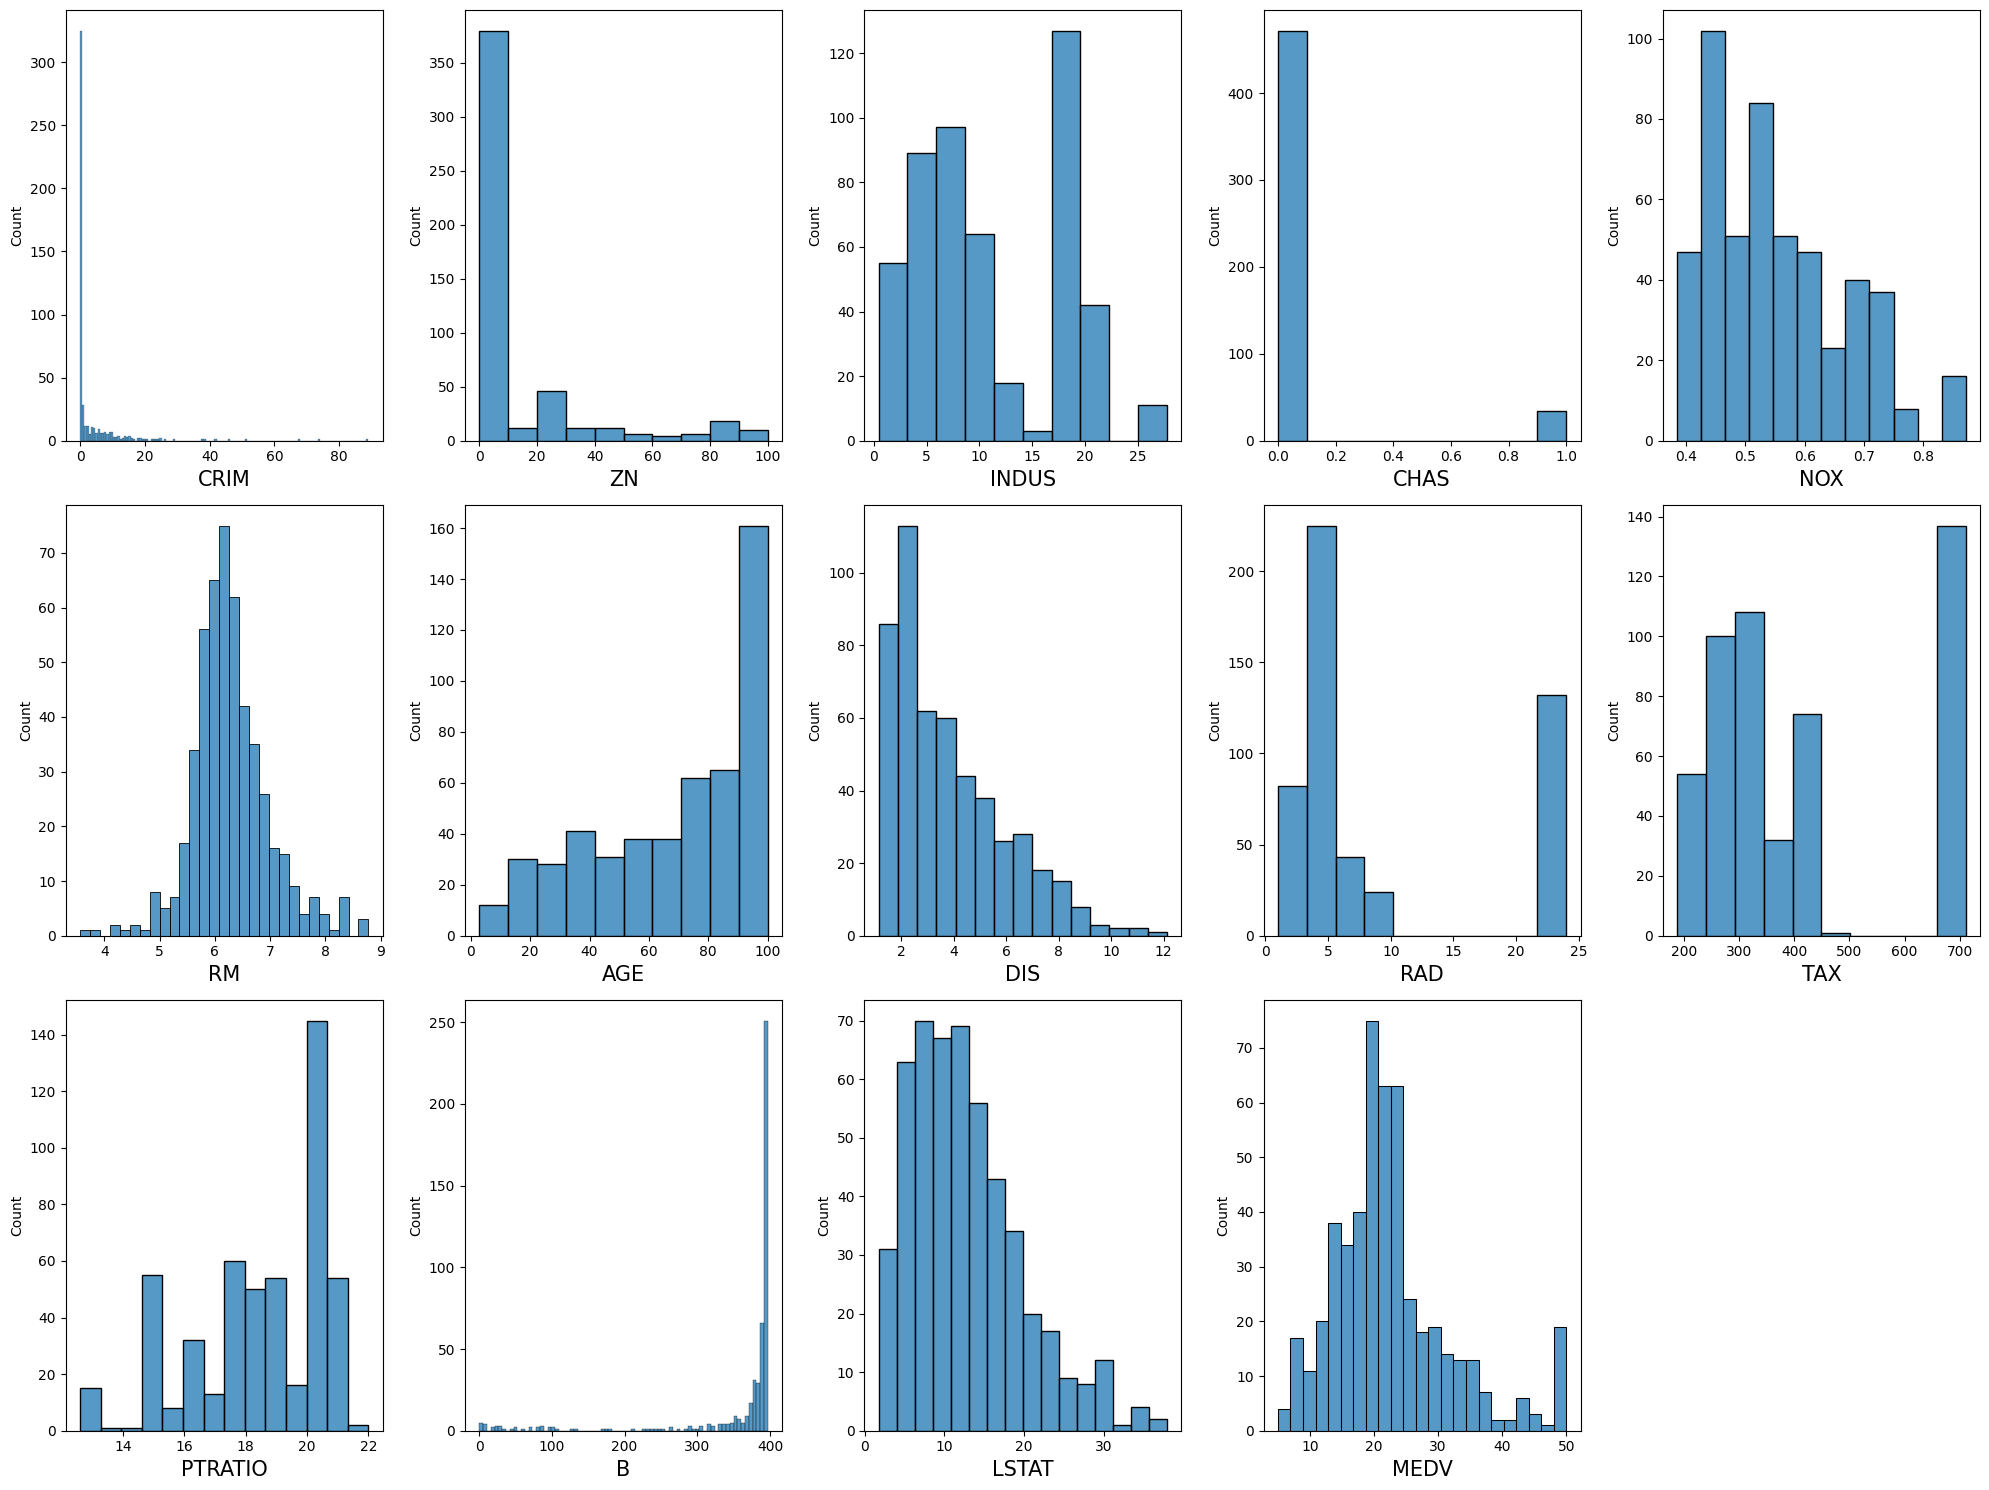

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in boston_housing:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(boston_housing[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

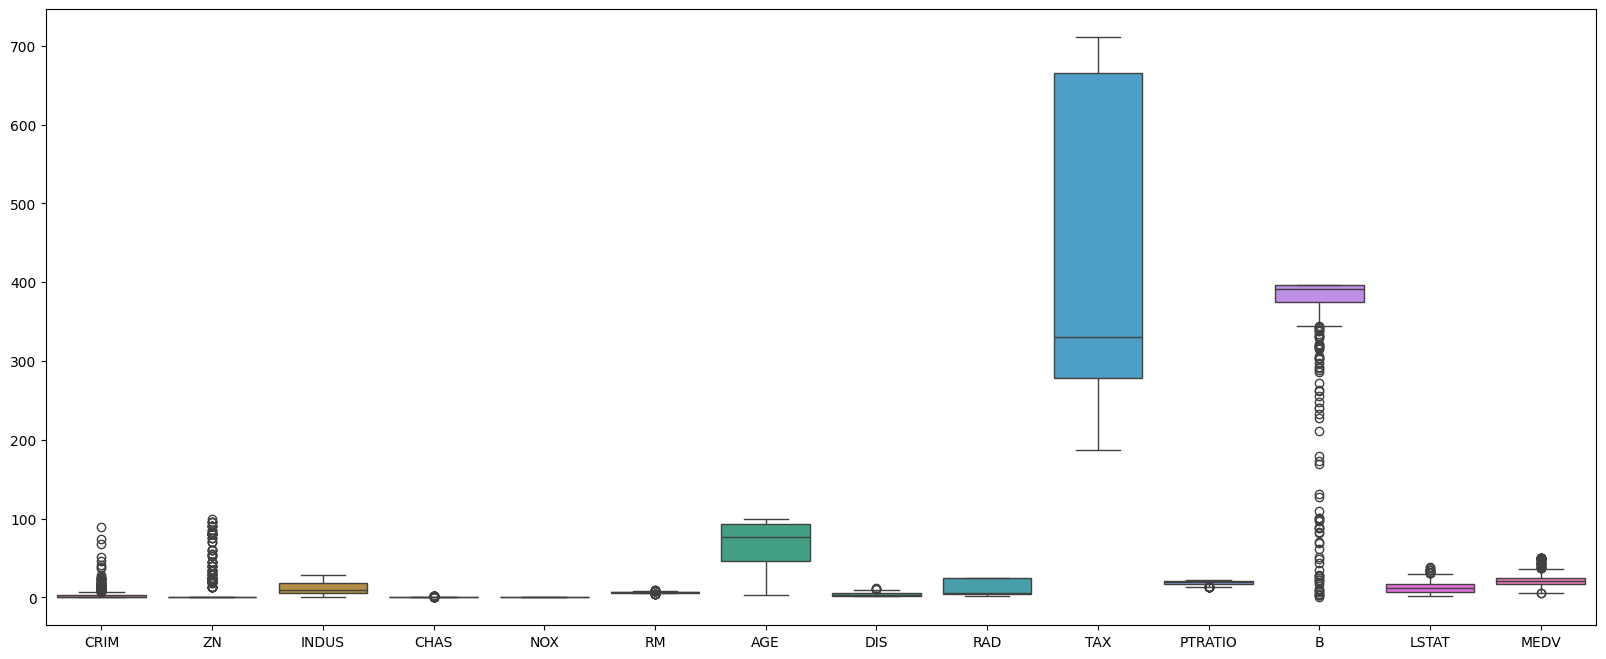

In [18]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = boston_housing, width = 0.8)
plt.show()

#### As we can see, the data is affected by outliers, so we use Robust Scaling to remove them, as the Robust Scaler is not sensitive 
#### to outliers and is better suited to skewed data.

In [19]:
from sklearn.preprocessing import RobustScaler

X = boston_housing.drop(columns = 'MEDV', axis = 1)
y = boston_housing['MEDV']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-0.090771  , 18.        , -0.57164988, ..., -1.33928571,
         0.26190191, -0.69057816],
       [-0.08306962,  0.        , -0.20294345, ..., -0.44642857,
         0.26190191, -0.24518201],
       [-0.08307696,  0.        , -0.20294345, ..., -0.44642857,
         0.06667466, -0.79229122],
       ...,
       [-0.07079657,  0.        ,  0.17350891, ...,  0.69642857,
         0.26190191, -0.61991435],
       [-0.0528805 ,  0.        ,  0.17350891, ...,  0.69642857,
         0.09641444, -0.52997859],
       [-0.07569478,  0.        ,  0.17350891, ...,  0.69642857,
         0.26190191, -0.38008565]], shape=(506, 13))

#### We use 'VIF' to detect multicollinearity along with a correlation heatmap

In [24]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.4 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.8 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.8 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 3.5 MB/s eta 0:00:01
   ------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,VIF,Features
0,1.928159,CRIM
1,2.560713,ZN
2,3.604949,INDUS
3,1.110968,CHAS
4,4.289313,NOX
5,1.856048,RM
6,2.825615,AGE
7,3.756403,DIS
8,9.071977,RAD
9,10.788386,TAX


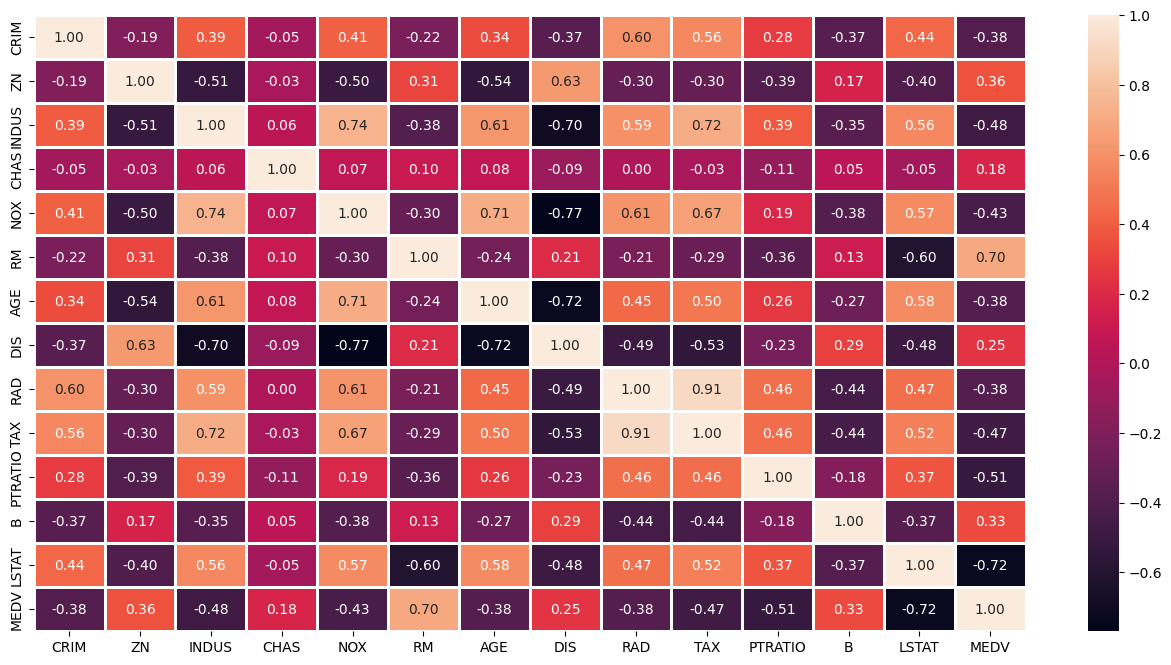

In [27]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(boston_housing.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

#### Since RAD and TAX are highly correlated and RAD has a higher VIF then TAX, we drop RAD.
#### By analysis, we can also conclude then TAX's have a higher correlation with MEDV(House Price) than RAD

In [28]:
boston_housing.drop(columns = 'RAD', axis = 1, inplace = True)

In [30]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 2.8 MB/s eta 0:02:14
   ---------------------------------------- 1.8/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 2.9/376.0 MB 3.6 MB/s eta 0:01:43
   ---------------------------------------- 2.9/376.0 MB 3.6 MB/s eta 0:01:43
   ---------------------------------------- 2.9/376.0 MB 3.6 MB/s eta 0:01:43
    --------------------------------------- 5.0/376.0 MB 3.7 MB/s eta 0:01:41
    --------------------------------------- 5.2/376.0 MB 3.1 MB/s eta 0:01:59
    --------------------------------------- 6.0/376.0 MB 3.3 MB/s eta 0:01:53
    --------------------------------------- 6.6/376.0 MB 3.4 MB/s eta 0:01:51
    ------------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model configurations to try
architectures = {
    "1 layer (64)": [64],
    "2 layers (64, 32)": [64, 32],
    "3 layers (128, 64, 32)": [128, 64, 32],
    "2 layers (100, 50)": [100, 50],
    "3 layers (50, 50, 50)": [50, 50, 50]
}

mse_results = {}

# Train and evaluate each architecture
for name, layers_config in architectures.items():
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    # Add hidden layers
    for units in layers_config:
        model.add(layers.Dense(units, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1))  # Regression output
    
    # Compile
    model.compile(optimizer='adam', loss='mse')
    
    # Train
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name} - MSE: {mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 
1 layer (64) - MSE: 12.6321
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 
2 layers (64, 32) - MSE: 11.6973
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 
3 layers (128, 64, 32) - MSE: 12.1619
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2 layers (100, 50) - MSE: 10.8169
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 
3 layers (50, 50, 50) - MSE: 11.5672


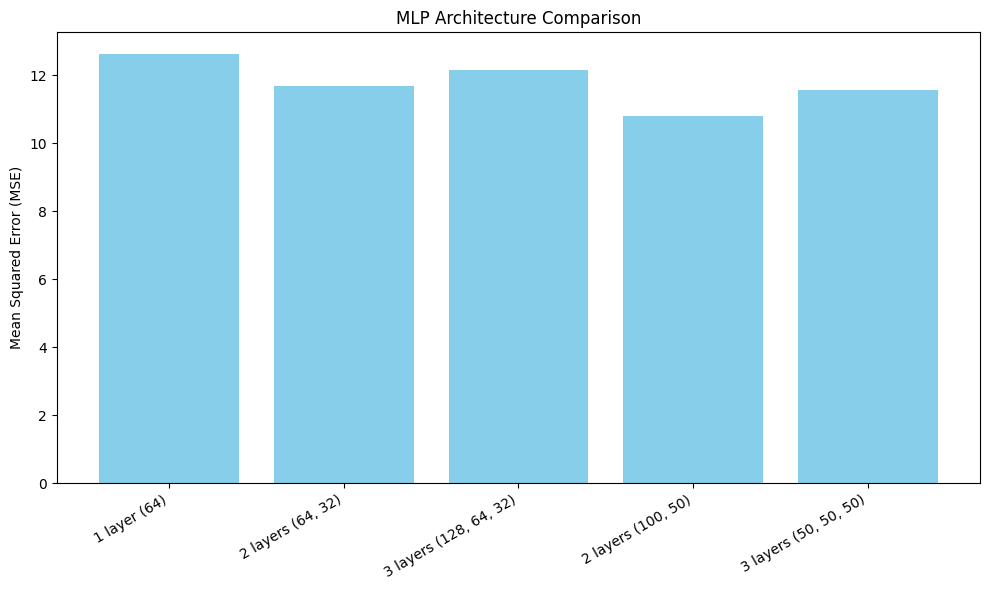

In [32]:
# Plotting the MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(mse_results.keys(), mse_results.values(), color='skyblue')
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MLP Architecture Comparison")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## MLP Architecture Comparison – Insights

| Architecture          | Approx. MSE | Comments                                 |
|-----------------------|-------------|------------------------------------------|
| 1 layer (64)          | ~12.7       | Baseline model, highest error            |
| 2 layers (64, 32)     | ~11.7       | Improved over single layer               |
| 3 layers (128, 64, 32)| ~12.2       | Slight overfitting, possibly too complex |
| 2 layers (100, 50)    | ~10.8       | **Best performer – good balance**        |
| 3 layers (50, 50, 50) | ~11.5       | Decent, but not better than 100–50       |

## **Conclusion**: The 2-layer (100, 50) model had the best generalization performance. More layers or units do not guarantee better results, and overly complex models may overfit.
